<a href="https://colab.research.google.com/github/RasilZiyatdinov/WebAnalyse_PSTU/blob/master/Labs/2024-11-12(lab5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

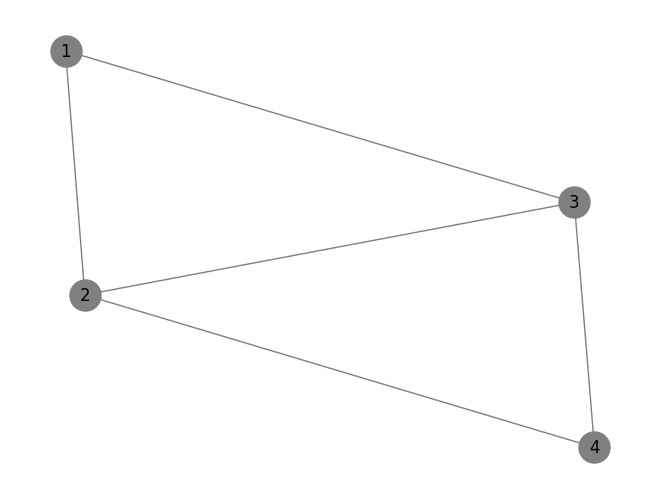

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_color='gray', node_size=500, edge_color='gray')
plt.show()

Базисные циклы: [[(1, 0, 1), (1, 0, 0), (1, 1, 0), (1, 1, 1)], [(0, 1, 0), (0, 0, 0), (1, 0, 0), (1, 1, 0)], [(1, 0, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0)], [(0, 1, 1), (0, 0, 1), (0, 0, 0), (1, 0, 0), (1, 1, 0), (1, 1, 1)], [(0, 1, 1), (0, 1, 0), (1, 1, 0), (1, 1, 1)]]


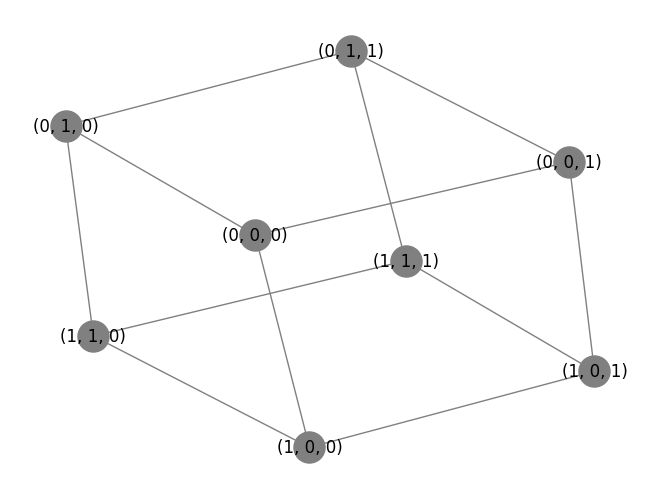

In [4]:
cube = nx.hypercube_graph(3)

basis_cycles = nx.cycle_basis(cube)

nx.draw(cube, with_labels=True, node_color='gray', node_size=500, edge_color='gray')
plt.show()

print("Базисные циклы:", basis_cycles)

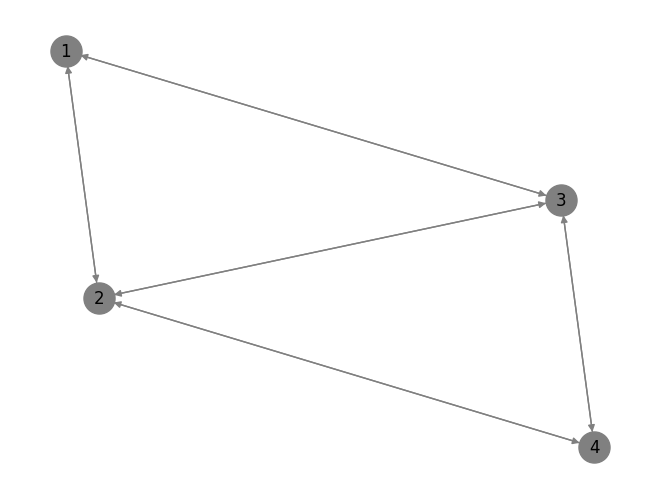

Циклы в ориентированном графе: [[1, 2, 3], [1, 2, 4, 3], [1, 2], [1, 3, 4, 2], [1, 3], [1, 3, 2], [2, 3, 4], [2, 3], [2, 4], [2, 4, 3], [3, 4]]


In [5]:
D = nx.DiGraph()
D.add_edges_from((u, v) for u, v in edges + [(v, u) for u, v in edges])

cycles = list(nx.simple_cycles(D))

nx.draw(D, with_labels=True, node_color='gray', node_size=500, edge_color='gray')
plt.show()

print("Циклы в ориентированном графе:", cycles)


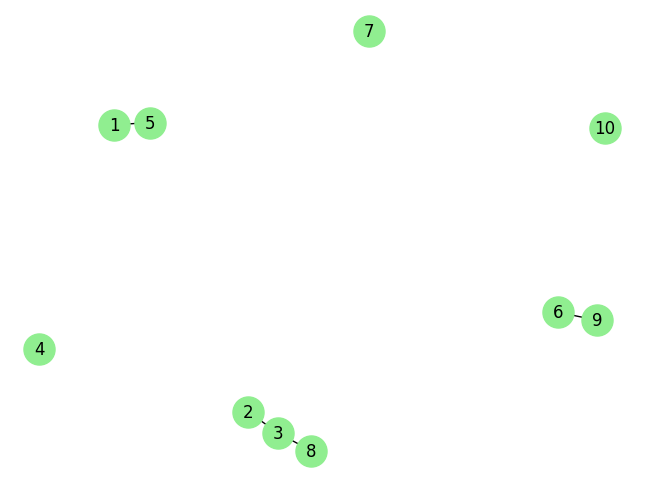

In [8]:
import random

# Создаем случайный граф
random_graph = nx.Graph()
n = 10
p = 0.1
random_graph.add_nodes_from(list(range(1, n + 1)))

for i in range(n):
    for j in range(i + 1, n):
        if random.random() < p:
            random_graph.add_edge(i, j)

# Рисуем граф
nx.draw(random_graph, with_labels=True, node_color='lightgreen', node_size=500, edge_color='black')
plt.show()


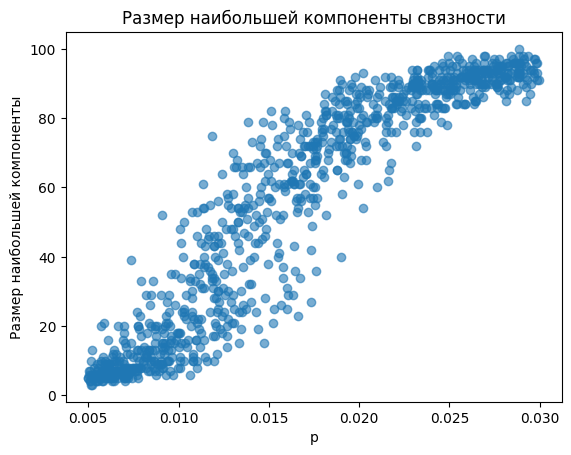

In [ ]:
import numpy as np

n = 100
iterations = 1000
p_values = np.random.uniform(0.005, 0.03, iterations)
largest_components = []

for p in p_values:
    G = nx.erdos_renyi_graph(n, p)
    largest_cc = max(len(c) for c in nx.connected_components(G))
    largest_components.append(largest_cc)

# Построение графика
plt.scatter(p_values, largest_components, alpha=0.6)
plt.title("Размер наибольшей компоненты связности")
plt.xlabel("p")
plt.ylabel("Размер наибольшей компоненты")
plt.show()


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Processing id: 1238280
Processing id: 18757951
Processing id: 19342213
Processing id: 19542491
Processing id: 28013946
Processing id: 31132882
Processing id: 31696286
Processing id: 32469664
Error fetching friends for user_id 32469664: User was deleted or banned
Processing id: 35391370
Processing id: 38455316
Processing id: 38524636
Processing id: 44311848
Processing id: 49605525
Processing id: 50909917
Processing id: 51170094
Processing id: 51303016
Processing id: 51737538
Processing id: 54088829
Processing id: 55469744
Processing id: 57635411
Processing id: 57881402
Processing id: 61805132
Processing id: 64501138
Processing id: 66913223
Processing id: 67513235
Processing id: 68989250
Processing id: 71965312
Processing id: 75405170
Processing id: 81883769
Proce

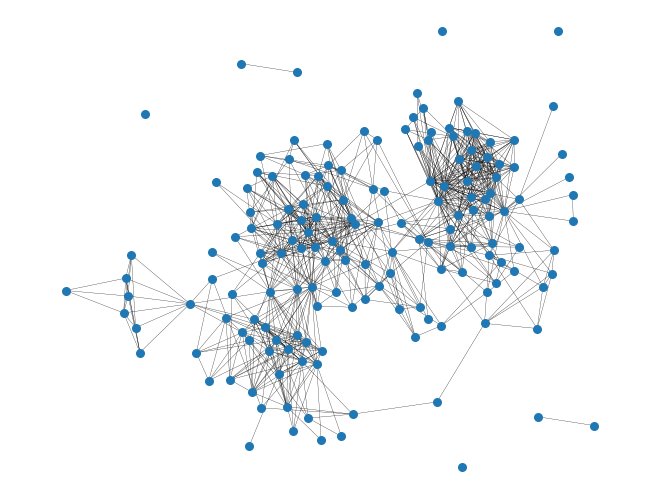

In [32]:
import requests
import networkx
import time
import collections
from networkx.drawing.nx_agraph import graphviz_layout
import graphviz

!apt install libgraphviz-dev
!pip install pygraphviz

def get_friends_ids(user_id):
    try:
        user_id = int(user_id)
        friends_url = (f'http://api.vk.com/method/friends.get?user_id={user_id}'
                       f'&v=5.199&access_token=vk1.a.3KoqLQksFmbTj9HYK6IUzKmW8rb5EIVQYDgp-v_pyXXM7vjR9rNPt1y9KpRAvs6AUXCc64Up8nzhxfIi0y_k6_KxnGhnPej2er9069dqY6cUyC2pa8bPbSlhbEDgVBnI34w1mpGj5p9OJYZMW-gU3FTbChHImUxwNmpfohTGujUj4n3-sHyfAhMx0JKSRWDW_QO2njDM1KUdCCTHppR2xA')

        json_response = requests.get(friends_url).json()
        if 'error' in json_response:
            print(f"Error fetching friends for user_id {user_id}: {json_response['error']['error_msg']}")
            return []

        time.sleep(0.34)
        return json_response.get('response', {}).get('items', [])

    except ValueError:
        print(f"Invalid user_id: {user_id}. Must be an integer.")
        return []



graph = {}
friend_ids = get_friends_ids(266719632)  # ваш user id, для которого вы хотите построить граф друзей.
for friend_id in friend_ids:
    print(f'Processing id: {friend_id}')
    graph[friend_id] = get_friends_ids(friend_id)

g = networkx.Graph(directed=False)
for i in graph:
    g.add_node(i)
    for j in graph[i]:
        if i != j and i in friend_ids and j in friend_ids:
            g.add_edge(i, j)

pos=graphviz_layout(g,prog="neato")
networkx.draw(g, pos, node_size=30, with_labels=False, width=0.2)